In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

In [2]:
# Load Dataset
LE_BMI_data = pd.read_csv('data/bmi_and_life_expectancy.csv')
LE_Year_data = pd.read_csv('data/Life Expectancy Data 2.csv')
LE_BMI_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [3]:
# Create the X and y variables to fit to our model
X_BMI = LE_BMI_data[['BMI']]
y_BMI = LE_BMI_data[['Life expectancy']]

In [4]:
# Create a model to train the system using Linear Regression

BMI_model = LinearRegression()
BMI_model.fit(X_BMI,y_BMI)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<function matplotlib.pyplot.show>

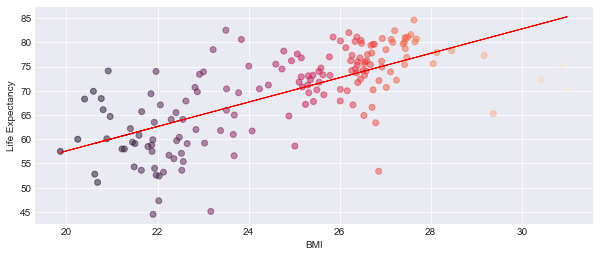

In [7]:
# Predict the Data and plot a scatter chart
sns.set_style("darkgrid",)
plt.figure(figsize=(10,4))
plt.scatter(X_BMI.values,y_BMI.values,alpha = 0.5 , c=X_BMI.values,)
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.plot(X_BMI,BMI_model.predict(X_BMI), color='red',linewidth=1)
plt.savefig('images/BMI_LifeExpect.png')
plt.show


In [9]:
# Using the BMI model to predict the Life Expectancy of a person

BMI = {}

BMI_model.predict(25)

array([[70.18982432]])

In [10]:
# Create a model to predict the Life Expectancy based on Year

LE_Year_data.rename(columns={'Life expectancy (Clio-Infra up to 1949; UN Population Division for 1950 to 2015)':'Life Expectancy'}, inplace = True)
LE_Year_data.head()

,Entity,Code,Year,Life Expectancy
0,Afghanistan,AFG,1950,27.537001
1,Afghanistan,AFG,1951,27.809999
2,Afghanistan,AFG,1952,28.350000
3,Afghanistan,AFG,1953,28.879999
4,Afghanistan,AFG,1954,29.399000


In [11]:
# Predict data for USA 
LE_Year_data_usa = LE_Year_data.loc[LE_Year_data['Code'] == 'USA']
LE_Year_data_usa.head()

,Entity,Code,Year,Life Expectancy
16777,United States,USA,1880,39.410000
16778,United States,USA,1890,45.209999
16779,United States,USA,1901,49.299999
16780,United States,USA,1902,50.500000
16781,United States,USA,1903,50.599998


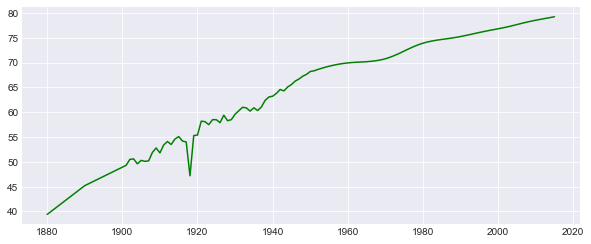

In [12]:
# Plot the line chart for USA year and Life Expectancy Data
sns.set_style("darkgrid")
X = LE_Year_data_usa[['Year']]
y = LE_Year_data_usa[['Life Expectancy']]
plt.figure(figsize=(10,4))
plt.plot(X,y,c='green')

In [14]:
# Create a model to predic the future Life Expectancy

Year_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
Year_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Weight coefficients: ', Year_model.coef_)
print('y-axis intercept: ', Year_model.intercept_) 


Weight coefficients:  [[0.26924786]]
y-axis intercept:  [-460.24206844]


# Linear Model 
y = -464.42092776+0.2713566x


In [16]:
predictions = Year_model.predict(X_test)

In [17]:
x_min = X.min()
x_max = X.max()

y_min_actual = y.min()
y_max_actual = y.max()

y_min = -460.24206844 + 0.26924786 * x_min
y_max = -460.24206844 + 0.26924786 * x_max


In [18]:
# plt.figure(figsize=(16,5))
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test,predictions, color='blue', linewidth=3)


In [19]:
Year_model.predict(2070)[0][0]

97.10100029851463

In [48]:
future_LE = []
future_years = []

for i in range(2015,2040):
    future_years.append(i+1)



In [49]:
#future_years.head()

In [50]:
for year in future_years:
    future_LE.append(Year_model.predict(year)[0][0])

In [51]:
future_LE

[82.56161589669551,
 82.83086375598845,
 83.10011161528138,
 83.36935947457431,
 83.63860733386724,
 83.90785519316029,
 84.17710305245322,
 84.44635091174615,
 84.71559877103908,
 84.98484663033202,
 85.25409448962495,
 85.52334234891788,
 85.79259020821092,
 86.06183806750386,
 86.33108592679679,
 86.60033378608972,
 86.86958164538265,
 87.13882950467558,
 87.40807736396852,
 87.67732522326145,
 87.94657308255438,
 88.21582094184743,
 88.48506880114036,
 88.75431666043329,
 89.02356451972622]

In [52]:
future_pred = pd.DataFrame({'Future Years':future_years,'Life Expectancy':future_LE})
future_pred.to_csv('predicted years.csv', header=True)

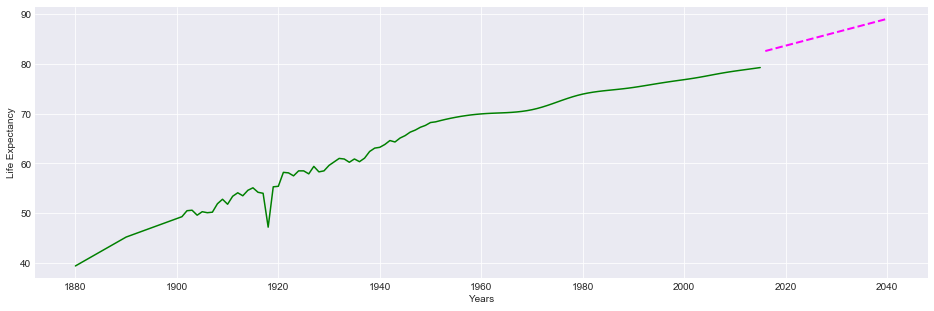

In [59]:
plt.figure(figsize=(16,5))
plt.plot(X,y,c='green')
plt.plot(future_years, future_LE,linestyle='dashed',linewidth=2,c='magenta')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.savefig('images/Years_LE.png')
plt.show()